<a href="https://colab.research.google.com/github/renisio/Irriga-o-Inteligente-Otimiza-o-do-Gotejamento-com-Intelig-ncia-Artificial/blob/main/Gotej_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FloatSlider(value=11.6, description='ET (mm)', max=20.0)

FloatSlider(value=3.9, description='P (mm)', max=20.0)

FloatSlider(value=4.0, description='R (mm)', max=20.0)

FloatSlider(value=2.6, description='Fluxo', max=10.0)

Irrigação necessária: 30.42 mm


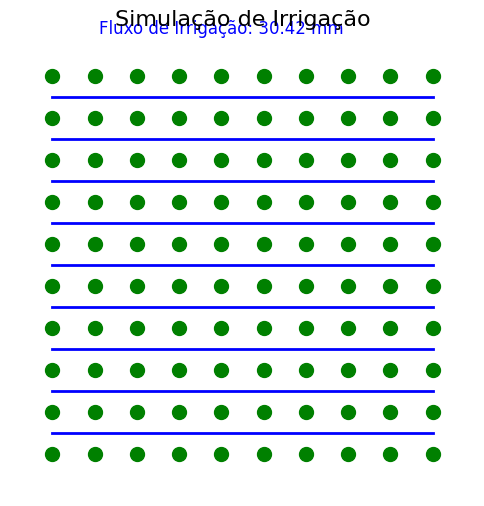

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output

# Parâmetros iniciais
et = widgets.FloatSlider(value=10, min=0, max=20, step=0.1, description='ET (mm)')
p = widgets.FloatSlider(value=5, min=0, max=20, step=0.1, description='P (mm)')
r = widgets.FloatSlider(value=2, min=0, max=20, step=0.1, description='R (mm)')
flow = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='Fluxo')

# Exibindo os sliders
display(et, p, r, flow)

# Função para calcular a irrigação
def calculate_irrigation(change):
    clear_output(wait=True)

    # Fórmula de irrigação
    I = et.value - p.value + r.value
    irrigation_needed = I * flow.value

    # Exibe a interface novamente após o clear_output
    display(et, p, r, flow)

    # Exibe o resultado numérico
    print(f'Irrigação necessária: {irrigation_needed:.2f} mm')

    # Desenha o campo com o sistema de irrigação
    draw_field(irrigation_needed)

# Função para desenhar o campo com o sistema de irrigação
def draw_field(irrigation_needed):
    # Cria uma simulação de 10 fileiras de plantação
    fig, ax = plt.subplots(figsize=(6, 6))

    # Desenha as plantas como pontos verdes
    for i in range(10):
        y = np.ones(10) * i
        x = np.arange(10)
        ax.scatter(x, y, color='green', s=100, label="Plantação" if i == 0 else "")

    # Desenha os canos de irrigação
    for i in range(9):
        ax.plot([0, 9], [i + 0.5, i + 0.5], color='blue', lw=2, label="Irrigação" if i == 0 else "")

    # Ajusta o eixo
    ax.set_xlim(-1, 10)
    ax.set_ylim(-1, 10)

    # Exibe o valor da irrigação no gráfico
    ax.text(4, 10, f'Fluxo de Irrigação: {irrigation_needed:.2f} mm', fontsize=12, ha='center', color='blue')

    ax.set_title("Simulação de Irrigação", fontsize=16)
    ax.axis('off')

    plt.show()

# Atualizando o valor quando um dos sliders mudar
for w in [et, p, r, flow]:
    w.observe(calculate_irrigation, names='value')

# Calcula a irrigação inicialmente
calculate_irrigation(None)


In [ ]:
import random
import ipywidgets as widgets
from IPython.display import display, clear_output

# Função para calcular o tempo de irrigação com base na ETo, Kc e vazão
def calcular_tempo_irrigacao(ETo, Kc, area_por_planta, vazao_gotejador, num_gotejadores, eficiencia):
    ETc = Kc * ETo
    volume_agua = ETc * area_por_planta  # Volume de água necessário em litros
    vazao_total = vazao_gotejador * num_gotejadores  # Vazão total por planta
    tempo_irrigacao = volume_agua / vazao_total  # Tempo em horas
    tempo_ajustado = tempo_irrigacao / eficiencia  # Ajuste pela eficiência
    return tempo_ajustado

# Parâmetros fixos do sistema de irrigação
ETo = 5.0  # Evapotranspiração de referência (mm/dia)
Kc = 0.85  # Coeficiente de cultura
area_por_planta = 6  # Área que cada planta ocupa em m²
vazao_gotejador = 4  # Vazão de cada gotejador (L/h)
num_gotejadores = 2  # Número de gotejadores por planta
eficiencia = 0.9  # Eficiência do sistema de irrigação

# Definição do estado das plantas
class Plantacao:
    def __init__(self, num_fileiras):
        self.num_fileiras = num_fileiras
        self.plantas_por_fileira = [random.uniform(3, 7) for _ in range(num_fileiras)]  # Nº de plantas em cada fileira
        self.agua_necessaria = [calcular_tempo_irrigacao(ETo, Kc, area_por_planta, vazao_gotejador, num_gotejadores, eficiencia) for _ in range(num_fileiras)]
        self.agua_aplicada = [0] * num_fileiras  # Inicialmente, nenhuma água aplicada

    def irrigar(self, fileira, tempo):
        self.agua_aplicada[fileira] += tempo

    def checar_estado(self):
        estados = []
        for i in range(self.num_fileiras):
            if self.agua_aplicada[i] < self.agua_necessaria[i]:
                estados.append(f"Fileira {i + 1}: Precisa de mais água.")
            elif self.agua_aplicada[i] > self.agua_necessaria[i]:
                estados.append(f"Fileira {i + 1}: Excesso de água!")
            else:
                estados.append(f"Fileira {i + 1}: Irrigação correta.")
        return estados

# Função para atualizar o estado da plantação
def atualizar_plantacao(fileira_selecionada, tempo_irrigacao):
    plantacao.irrigar(fileira_selecionada, tempo_irrigacao)
    estado_atual = plantacao.checar_estado()
    clear_output()
    print("\n".join(estado_atual))
    display(fileira_selector, tempo_slider, irrigar_button)

# Criando a plantação
plantacao = Plantacao(8)

# Interface interativa com widgets
fileira_selector = widgets.Dropdown(
    options=[(f'Fileira {i+1}', i) for i in range(plantacao.num_fileiras)],
    description='Fileira:',
)

tempo_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=10,
    step=0.1,
    description='Tempo (h):',
    continuous_update=False
)

irrigar_button = widgets.Button(
    description='Irrigar',
    button_style='success'
)

def on_irrigar_button_clicked(b):
    atualizar_plantacao(fileira_selector.value, tempo_slider.value)

irrigar_button.on_click(on_irrigar_button_clicked)

# Exibir a interface
display(fileira_selector, tempo_slider, irrigar_button)


Fileira 1: Excesso de água!
Fileira 2: Excesso de água!
Fileira 3: Excesso de água!
Fileira 4: Excesso de água!
Fileira 5: Precisa de mais água.
Fileira 6: Precisa de mais água.
Fileira 7: Precisa de mais água.
Fileira 8: Precisa de mais água.


Dropdown(description='Fileira:', index=3, options=(('Fileira 1', 0), ('Fileira 2', 1), ('Fileira 3', 2), ('Fil…

FloatSlider(value=1.4, continuous_update=False, description='Tempo (h):', max=10.0)

Button(button_style='success', description='Irrigar', style=ButtonStyle())

In [ ]:
pip install pygame


In [ ]:
import random
import ipywidgets as widgets
from IPython.display import display, clear_output

# Função para calcular o tempo de irrigação com base na ETo, Kc e vazão
def calcular_tempo_irrigacao(ETo, Kc, area_por_planta, vazao_gotejador, num_gotejadores, eficiencia):
    ETc = Kc * ETo
    volume_agua = ETc * area_por_planta  # Volume de água necessário em litros
    vazao_total = vazao_gotejador * num_gotejadores  # Vazão total por planta
    tempo_irrigacao = volume_agua / vazao_total  # Tempo em horas
    tempo_ajustado = tempo_irrigacao / eficiencia  # Ajuste pela eficiência
    return tempo_ajustado

# Definição do estado das plantas
class Plantacao:
    def __init__(self, num_fileiras):
        self.num_fileiras = num_fileiras
        self.plantas_por_fileira = [random.uniform(3, 7) for _ in range(num_fileiras)]  # Nº de plantas em cada fileira
        self.agua_necessaria = [0] * num_fileiras  # Água necessária inicial (atualizada depois)
        self.agua_aplicada = [0] * num_fileiras  # Inicialmente, nenhuma água aplicada

    def atualizar_agua_necessaria(self, ETo, Kc, area_por_planta, vazao_gotejador, num_gotejadores, eficiencia):
        self.agua_necessaria = [calcular_tempo_irrigacao(ETo, Kc, area_por_planta, vazao_gotejador, num_gotejadores, eficiencia) for _ in range(self.num_fileiras)]

    def irrigar(self, fileira, tempo):
        self.agua_aplicada[fileira] += tempo

    def checar_estado(self):
        estados = []
        for i in range(self.num_fileiras):
            if self.agua_aplicada[i] < self.agua_necessaria[i]:
                estados.append(f"Fileira {i + 1}: Precisa de mais água.")
            elif self.agua_aplicada[i] > self.agua_necessaria[i]:
                estados.append(f"Fileira {i + 1}: Excesso de água!")
            else:
                estados.append(f"Fileira {i + 1}: Irrigação correta.")
        return estados

# Função para atualizar o estado da plantação
def atualizar_plantacao(fileira_selecionada, tempo_irrigacao):
    plantacao.irrigar(fileira_selecionada, tempo_irrigacao)
    estado_atual = plantacao.checar_estado()
    clear_output()
    print("\n".join(estado_atual))
    display(fileira_selector, tempo_slider, eto_slider, kc_slider, eficiencia_slider, irrigar_button)

# Função para atualizar os parâmetros e a quantidade de água necessária
def atualizar_parametros(change=None):
    ETo = eto_slider.value
    Kc = kc_slider.value
    eficiencia = eficiencia_slider.value
    plantacao.atualizar_agua_necessaria(ETo, Kc, area_por_planta, vazao_gotejador, num_gotejadores, eficiencia)
    atualizar_plantacao(fileira_selector.value, 0)  # Apenas atualiza o estado sem irrigar

# Parâmetros variáveis do sistema de irrigação (controlados pelos sliders)
area_por_planta = 6  # Área que cada planta ocupa em m²
vazao_gotejador = 4  # Vazão de cada gotejador (L/h)
num_gotejadores = 2  # Número de gotejadores por planta

# Criando a plantação
plantacao = Plantacao(8)

# Sliders interativos
fileira_selector = widgets.Dropdown(
    options=[(f'Fileira {i+1}', i) for i in range(plantacao.num_fileiras)],
    description='Fileira:',
)

tempo_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=10,
    step=0.1,
    description='Tempo (h):',
    continuous_update=False
)

# Sliders para os parâmetros do sistema de irrigação
eto_slider = widgets.FloatSlider(
    value=5.0,
    min=0,
    max=10,
    step=0.1,
    description='ETo (mm):',
    continuous_update=False
)

kc_slider = widgets.FloatSlider(
    value=0.85,
    min=0,
    max=1.5,
    step=0.05,
    description='Kc:',
    continuous_update=False
)

eficiencia_slider = widgets.FloatSlider(
    value=0.9,
    min=0.5,
    max=1.0,
    step=0.05,
    description='Eficiência:',
    continuous_update=False
)

irrigar_button = widgets.Button(
    description='Irrigar',
    button_style='success'
)

def on_irrigar_button_clicked(b):
    atualizar_plantacao(fileira_selector.value, tempo_slider.value)

# Associar o clique do botão à função de irrigar
irrigar_button.on_click(on_irrigar_button_clicked)

# Atualizar os parâmetros de irrigação quando sliders forem ajustados
eto_slider.observe(atualizar_parametros, names='value')
kc_slider.observe(atualizar_parametros, names='value')
eficiencia_slider.observe(atualizar_parametros, names='value')

# Exibir a interface
display(fileira_selector, tempo_slider, eto_slider, kc_slider, eficiencia_slider, irrigar_button)

# Inicializar a quantidade de água necessária
atualizar_parametros()


Fileira 1: Precisa de mais água.
Fileira 2: Precisa de mais água.
Fileira 3: Precisa de mais água.
Fileira 4: Precisa de mais água.
Fileira 5: Precisa de mais água.
Fileira 6: Precisa de mais água.
Fileira 7: Precisa de mais água.
Fileira 8: Precisa de mais água.


Dropdown(description='Fileira:', options=(('Fileira 1', 0), ('Fileira 2', 1), ('Fileira 3', 2), ('Fileira 4', …

FloatSlider(value=0.0, continuous_update=False, description='Tempo (h):', max=10.0)

FloatSlider(value=5.0, continuous_update=False, description='ETo (mm):', max=10.0)

FloatSlider(value=0.85, continuous_update=False, description='Kc:', max=1.5, step=0.05)

FloatSlider(value=0.9, continuous_update=False, description='Eficiência:', max=1.0, min=0.5, step=0.05)

Button(button_style='success', description='Irrigar', style=ButtonStyle())

In [ ]:
import random
import ipywidgets as widgets
from IPython.display import display, clear_output

# Função para calcular o tempo de irrigação com base na ETo, Kc e vazão
def calcular_tempo_irrigacao(ETo, Kc, area_por_planta, vazao_gotejador, num_gotejadores, eficiencia):
    ETc = Kc * ETo
    volume_agua = ETc * area_por_planta  # Volume de água necessário em litros
    vazao_total = vazao_gotejador * num_gotejadores  # Vazão total por planta
    tempo_irrigacao = volume_agua / vazao_total  # Tempo em horas
    tempo_ajustado = tempo_irrigacao / eficiencia  # Ajuste pela eficiência
    return tempo_ajustado

# Definição do estado das plantas
class Plantacao:
    def __init__(self, num_fileiras):
        self.num_fileiras = num_fileiras
        self.plantas_por_fileira = [random.uniform(3, 7) for _ in range(num_fileiras)]  # Nº de plantas em cada fileira
        self.agua_necessaria = [0] * num_fileiras  # Água necessária inicial (atualizada depois)
        self.agua_aplicada = [0] * num_fileiras  # Inicialmente, nenhuma água aplicada

    def atualizar_agua_necessaria(self, ETo, Kc, area_por_planta, vazao_gotejador, num_gotejadores, eficiencia):
        self.agua_necessaria = [calcular_tempo_irrigacao(ETo, Kc, area_por_planta, vazao_gotejador, num_gotejadores, eficiencia) for _ in range(self.num_fileiras)]

    def irrigar(self, fileira, tempo):
        self.agua_aplicada[fileira] += tempo

    def checar_estado(self):
        estados = []
        for i in range(self.num_fileiras):
            agua_restante = self.agua_necessaria[i] - self.agua_aplicada[i]
            if agua_restante > 0:
                estados.append(f"Fileira {i + 1}: Precisa de mais água. Tempo necessário: {agua_restante:.2f} h")
            elif self.agua_aplicada[i] > self.agua_necessaria[i]:
                estados.append(f"Fileira {i + 1}: Excesso de água!")
            else:
                estados.append(f"Fileira {i + 1}: Irrigação correta.")
        return estados

# Função para atualizar o estado da plantação
def atualizar_plantacao(fileira_selecionada, tempo_irrigacao):
    plantacao.irrigar(fileira_selecionada, tempo_irrigacao)
    estado_atual = plantacao.checar_estado()
    clear_output()
    print("\n".join(estado_atual))
    display(fileira_selector, tempo_slider, eto_slider, kc_slider, eficiencia_slider, irrigar_button)

# Função para atualizar os parâmetros e a quantidade de água necessária
def atualizar_parametros(change=None):
    ETo = eto_slider.value
    Kc = kc_slider.value
    eficiencia = eficiencia_slider.value
    plantacao.atualizar_agua_necessaria(ETo, Kc, area_por_planta, vazao_gotejador, num_gotejadores, eficiencia)
    atualizar_plantacao(fileira_selector.value, 0)  # Apenas atualiza o estado sem irrigar

# Parâmetros variáveis do sistema de irrigação (controlados pelos sliders)
area_por_planta = 6  # Área que cada planta ocupa em m²
vazao_gotejador = 4  # Vazão de cada gotejador (L/h)
num_gotejadores = 2  # Número de gotejadores por planta

# Criando a plantação
plantacao = Plantacao(8)

# Sliders interativos
fileira_selector = widgets.Dropdown(
    options=[(f'Fileira {i+1}', i) for i in range(plantacao.num_fileiras)],
    description='Fileira:',
)

tempo_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=10,
    step=0.1,
    description='Tempo (h):',
    continuous_update=False
)

# Sliders para os parâmetros do sistema de irrigação
eto_slider = widgets.FloatSlider(
    value=5.0,
    min=0,
    max=10,
    step=0.1,
    description='ETo (mm):',
    continuous_update=False
)

kc_slider = widgets.FloatSlider(
    value=0.85,
    min=0,
    max=1.5,
    step=0.05,
    description='Kc:',
    continuous_update=False
)

eficiencia_slider = widgets.FloatSlider(
    value=0.9,
    min=0.5,
    max=1.0,
    step=0.05,
    description='Eficiência:',
    continuous_update=False
)

irrigar_button = widgets.Button(
    description='Irrigar',
    button_style='success'
)

def on_irrigar_button_clicked(b):
    atualizar_plantacao(fileira_selector.value, tempo_slider.value)

# Associar o clique do botão à função de irrigar
irrigar_button.on_click(on_irrigar_button_clicked)

# Atualizar os parâmetros de irrigação quando sliders forem ajustados
eto_slider.observe(atualizar_parametros, names='value')
kc_slider.observe(atualizar_parametros, names='value')
eficiencia_slider.observe(atualizar_parametros, names='value')

# Exibir a interface
display(fileira_selector, tempo_slider, eto_slider, kc_slider, eficiencia_slider, irrigar_button)

# Inicializar a quantidade de água necessária
atualizar_parametros()


Fileira 1: Precisa de mais água. Tempo necessário: 3.90 h
Fileira 2: Precisa de mais água. Tempo necessário: 3.90 h
Fileira 3: Precisa de mais água. Tempo necessário: 3.90 h
Fileira 4: Precisa de mais água. Tempo necessário: 3.90 h
Fileira 5: Precisa de mais água. Tempo necessário: 3.90 h
Fileira 6: Precisa de mais água. Tempo necessário: 3.90 h
Fileira 7: Precisa de mais água. Tempo necessário: 3.90 h
Fileira 8: Precisa de mais água. Tempo necessário: 3.90 h


Dropdown(description='Fileira:', options=(('Fileira 1', 0), ('Fileira 2', 1), ('Fileira 3', 2), ('Fileira 4', …

FloatSlider(value=0.0, continuous_update=False, description='Tempo (h):', max=10.0)

FloatSlider(value=5.5, continuous_update=False, description='ETo (mm):', max=10.0)

FloatSlider(value=0.85, continuous_update=False, description='Kc:', max=1.5, step=0.05)

FloatSlider(value=0.9, continuous_update=False, description='Eficiência:', max=1.0, min=0.5, step=0.05)

Button(button_style='success', description='Irrigar', style=ButtonStyle())